# MILESTONE 1
### Ananta Faadillah Sophan
### Batch--002-hck

# PERKENALAN
## ```Latar Belakang```
Jual-beli pemain bola adalah bagian sentral di dunia persepakbolaan. Tiap musim panas atau musim dingin, triliunan rupiah bertukar tangan antara klub-klub besar di Eropa untuk pembelian pemain-pemain handal. Besarnya harga yang diperlukan untuk membeli pemain dan juga drama yang terkait kerap menjadi sebuah isu yang diperbincangkan di dunia sepakbola. Jual beli pemain hanya terjadi dua kali setahun di siklus yang disebut sebagai transfer window. FIFA memperbolehkan sebuah liga membuka bursa transfer sebelum musim dimulai dan saat libur musim dingin. Setiap negara mempunyai jendela jual-beli yang berbeda. Namun, tanggal yang ditentukan biasanya berdekatan untuk memungkinkan transfer pemain lintas negara. 

## ```Link Tableu```
https://public.tableau.com/views/FootballTransferAnalysis_16668794416520/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# IDENTIFIKASI MASALAH
## ```Problem Statement```

##### Analisa Transfer Pemain Sepakbola berdasarkan liga dari tim yang memenangkan kompetisi eropa (Champions League) dari tahun 2000 sampai 2018 

![grgrt](Picture2.jpg "tittle")
##### Berdasarkan Daftar Pemenang Champions League dari tahun 2001 Sampai 2019, Berikut adalah Pemenang yang dikelompokkan berdasarkan Liga
```
- LaLiga(Spain) = 9
- Premier League(England) =  4
- Serie A(Italy) = 3
- Bundesliga(Germany) = 2
- The Primeira Liga(Portugal) = 1
```
Berdasarkan daftar tersebut, saya akan menganalisa aktivitas transfer 3 liga yang teratas yang tim nya paling banyak memenangkan Champions League, yaitu La Liga(Spain), Premier League(England), Serie A(Italy)

## ```Problem Explanation```
1. Liga mana yang Mendapatkan Keuntungan/Kerugian terbesar selama 2000 sampai 2018?
2. Berapa rata-rata Transfer Fee pemain untuk setiap season?
3. Siapa pemain termahal yang pernah dibeli oleh klub dari 3 liga teratas selama 2000 sampai 2018?
4. Team apa saja yang paling banyak melakukan pembelian pemain?
5. Berapa rata-rata dari total pembelian dan umur pemain pada bursa transfer 2000-2018?
6. Apakah perbedaan rata-rata pengeluaran antara 3 klub teratas pada masing-masing liga signifikan?

# DATA LOADING
Import Library yang dibutuhkan

In [235]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Import Dataset (.csv)

In [236]:
tf = pd.read_csv('football.csv')
tf

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
...,...,...,...,...,...,...,...,...,...,...
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000


Data yang telah diimport berisi transfer dari berbagai liga di Eropa, saya hanya ingin mengambil data pembelian pemain dari liga Spanyol, Inggris, dan Italy

  

In [237]:
tf = tf[(tf['League_to']=='LaLiga')|(tf['League_to']=='Premier League')|(tf['League_to']=='Serie A')]
tf

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,NaN,26000000
...,...,...,...,...,...,...,...,...,...,...
4689,Jens Odgaard,Centre-Forward,19,Inter,Serie A,Sassuolo,Serie A,2018-2019,800000.0,5000000
4690,Marco Carraro,Defensive Midfield,20,Inter,Serie A,Atalanta,Serie A,2018-2019,800000.0,5000000
4692,Giangiacomo Magnani,Centre-Back,22,Juventus,Serie A,Sassuolo,Serie A,2018-2019,600000.0,5000000
4693,Giangiacomo Magnani,Centre-Back,22,Perugia,Serie B,Juventus,Serie A,2018-2019,600000.0,5000000


## ```Data Cleaning```

Melihat apakah ada Missing Values

In [238]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 0 to 4695
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2520 non-null   object 
 1   Position      2520 non-null   object 
 2   Age           2520 non-null   int64  
 3   Team_from     2520 non-null   object 
 4   League_from   2520 non-null   object 
 5   Team_to       2520 non-null   object 
 6   League_to     2520 non-null   object 
 7   Season        2520 non-null   object 
 8   Market_value  1910 non-null   float64
 9   Transfer_fee  2520 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 216.6+ KB


Handling Missing Values

In [239]:
tf.isnull().sum()

Name              0
Position          0
Age               0
Team_from         0
League_from       0
Team_to           0
League_to         0
Season            0
Market_value    610
Transfer_fee      0
dtype: int64

Missing Values hanya berada di kolom Market_value. kolom Market_value tidak akan saya gunakan, maka kolom tersebut akan di hapus

In [240]:
tf.drop('Market_value', inplace=True, axis=1)

c:\Users\ANCA\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [241]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 0 to 4695
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2520 non-null   object
 1   Position      2520 non-null   object
 2   Age           2520 non-null   int64 
 3   Team_from     2520 non-null   object
 4   League_from   2520 non-null   object
 5   Team_to       2520 non-null   object
 6   League_to     2520 non-null   object
 7   Season        2520 non-null   object
 8   Transfer_fee  2520 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 196.9+ KB


# ANALISIS DAN PERHITUNGAN
## ```Data Exploratory dan Penjabaran dari semua Problem Statement```
Melihat berapa banyak pembelian dari setiap liga


In [242]:
tftotal = tf['League_to'].value_counts()
tftotal = tftotal.to_frame()
tftotal

,League_to
Premier League,1256
Serie A,739
LaLiga,525


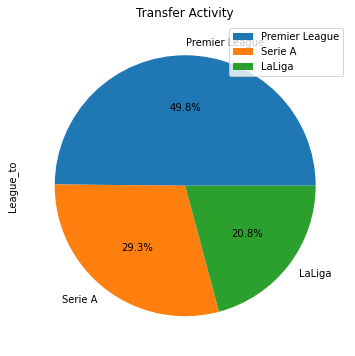

In [243]:
tftotal.plot.pie(subplots=True,autopct='%1.1f%%', figsize=(11, 6))
plt.title("Transfer Activity")
plt.show()

Melihat total penjualan dari setiap liga

In [244]:
topselling = tf.groupby(['League_from'])['Transfer_fee'].sum().sort_values(ascending=False).head(3)
topselling = topselling.to_frame()
topselling

,Transfer_fee
League_from,
Premier League,5999350000
Serie A,5844950000
LaLiga,4218770000


Melihat total pembelian dari setiap liga

In [245]:
topspending = tf.groupby(['League_to'])['Transfer_fee'].sum().sort_values(ascending=False).head(5)
topspending = topspending.to_frame()
topspending

,Transfer_fee
League_to,
Premier League,14695400000
Serie A,7535220000
LaLiga,6680360000


Melihat total kerugian/keuntungan yang didapatkan dari setiap liga

In [246]:
topprofit = topselling - topspending  

topprofit

,Transfer_fee
League_from,
Premier League,-8696050000
Serie A,-1690270000
LaLiga,-2461590000


##### Setelah dilihat selisih penjualan dan pembeliannya, semua liga mengalami kerugian.




Memisahkan data berdasarkan liganya

In [247]:
tfLaliga = tf.query('League_to == "LaLiga"')
tfprem = tf.query('League_to == "Premier League"')
tfserieA = tf.query('League_to == "Serie A"')


### ```1. Liga yang Mendapatkan Keuntungan/Kerugian terbesar selama 2001 sampai 2019```

In [248]:
income = pd.concat([topselling, topspending, topprofit], axis=1)
income.columns = ['Top_Selling', 'Top_Spending', 'Top_profit']
income = income.reset_index()
income

,index,Top_Selling,Top_Spending,Top_profit
0,Premier League,5999350000,14695400000,-8696050000
1,Serie A,5844950000,7535220000,-1690270000
2,LaLiga,4218770000,6680360000,-2461590000


In [249]:
income = pd.melt(income, id_vars=['index'], value_vars= ['Top_Selling','Top_Spending','Top_profit'])
income

,index,variable,value
0,Premier League,Top_Selling,5999350000
1,Serie A,Top_Selling,5844950000
2,LaLiga,Top_Selling,4218770000
3,Premier League,Top_Spending,14695400000
4,Serie A,Top_Spending,7535220000
5,LaLiga,Top_Spending,6680360000
6,Premier League,Top_profit,-8696050000
7,Serie A,Top_profit,-1690270000
8,LaLiga,Top_profit,-2461590000


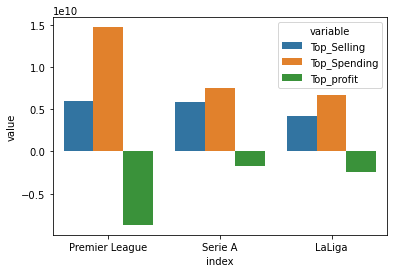

In [250]:
sns.barplot(data=income, x='index', y='value', hue='variable')

Dapat dilihat bahwa aktivitas transfer pada 3 liga teratas eropa lebih banyak melakukan pembelian pemain daripada menjual pemain, sehingga liga tersebut semuanya mengalami kerugian dalam aktivitas transfer selama 2000 sampai 2019 

### ```2. Rata-rata Transfer Fee pemain berdasarkan setiap season```

```Rata-rata Transfer Fee merupakan rata-rata biaya yang harus dikeluarkan oleh sebuah club jika ingin membeli seorang pemain. Saya ingin melihat pergerakan rata-rata harga pemain pada setiap season. Rata-rata transfer fee akan dibagi berdasarkan liganya``` 

### Premier League (England)

Mencari jumlah dari harga pembelian Premier League setiap season

In [251]:
totfeeprem = tfprem.groupby('Season')[['Transfer_fee']].sum()
totfeeprem.head(5)

,Transfer_fee
Season,
2000-2001,443700000
2001-2002,557300000
2002-2003,329670000
2003-2004,410020000
2004-2005,479310000


Mencari jumlah pemain yang dibeli oleh tim Premier League pada setiap season

In [252]:
totplayerprem = tfprem.groupby('Season')[['League_to']].count()
totplayerprem.head()

,League_to
Season,
2000-2001,65
2001-2002,73
2002-2003,58
2003-2004,65
2004-2005,68


In [253]:
premtf = pd.concat([totfeeprem, totplayerprem], axis=1)
premtf.columns = ['Total_Fee', 'Total_Player']
premtf['Ratio_PlayersVSFee'] = premtf['Total_Fee']/premtf['Total_Player']
premtf.head()
premtf

,Total_Fee,Total_Player,Ratio_PlayersVSFee
Season,,,
2000-2001,443700000,65,6.826154e+06
2001-2002,557300000,73,7.634247e+06
2002-2003,329670000,58,5.683966e+06
2003-2004,410020000,65,6.308000e+06
2004-2005,479310000,68,7.048676e+06
2005-2006,469430000,69,6.803333e+06
2006-2007,477270000,60,7.954500e+06
2007-2008,784330000,82,9.565000e+06
2008-2009,754590000,71,1.062803e+07


Text(0.5, 1.0, 'Rata-rata Transfer Fee pemain untuk setiap season')

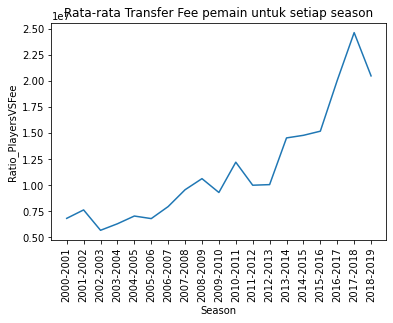

In [254]:
sns.lineplot(data=premtf, x =premtf.index, y = 'Ratio_PlayersVSFee')
plt.xticks(rotation = 90)
plt.title('Rata-rata Transfer Fee pemain untuk setiap season')

### La Liga (Spain)

Mencari jumlah dari harga pembelian La Liga setiap season

In [255]:
totfeelaliga = tfLaliga.groupby('Season')[['Transfer_fee']].sum()
totfeelaliga.head()

,Transfer_fee
Season,
2000-2001,362270000
2001-2002,276680000
2002-2003,136370000
2003-2004,134450000
2004-2005,219200000


Mencari jumlah pemain yang dibeli oleh tim La Liga pada setiap season

In [256]:
totplayerlaliga = tfLaliga.groupby('Season')[['League_to']].count()
totplayerlaliga.head()

,League_to
Season,
2000-2001,33
2001-2002,22
2002-2003,16
2003-2004,17
2004-2005,29


In [257]:
laligatf = pd.concat([totfeelaliga, totplayerlaliga], axis=1)
laligatf.columns = ['Total_Fee', 'Total_Player']
laligatf['Ratio_PlayersVSFee'] = laligatf['Total_Fee']/laligatf['Total_Player']
laligatf.head()

,Total_Fee,Total_Player,Ratio_PlayersVSFee
Season,,,
2000-2001,362270000,33,1.097788e+07
2001-2002,276680000,22,1.257636e+07
2002-2003,136370000,16,8.523125e+06
2003-2004,134450000,17,7.908824e+06
2004-2005,219200000,29,7.558621e+06


Text(0.5, 1.0, 'Rata-rata Transfer Fee pemain untuk setiap season')

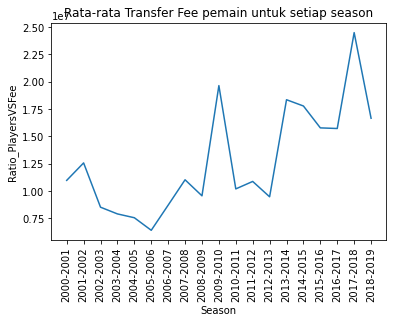

In [258]:
sns.lineplot(data=laligatf, x =laligatf.index, y = 'Ratio_PlayersVSFee')
plt.xticks(rotation = 90)
plt.title('Rata-rata Transfer Fee pemain untuk setiap season')

### Serie A (Italy)

Mencari jumlah dari harga pembelian Serie A setiap season

In [259]:
totfeeseriea = tfserieA.groupby('Season')[['Transfer_fee']].sum()
totfeeseriea.head()

,Transfer_fee
Season,
2000-2001,479100000
2001-2002,723340000
2002-2003,310790000
2003-2004,157930000
2004-2005,198350000


Mencari jumlah pemain yang dibeli oleh tim Serie A pada setiap season

In [260]:
totplayerseriea = tfserieA.groupby('Season')[['League_to']].count()
totplayerseriea.head()

,League_to
Season,
2000-2001,38
2001-2002,47
2002-2003,31
2003-2004,23
2004-2005,24


In [261]:
serieatf = pd.concat([totfeeseriea, totplayerseriea], axis=1)
serieatf.columns = ['Total_Fee', 'Total_Player']
serieatf['Ratio_PlayersVSFee'] = serieatf['Total_Fee']/serieatf['Total_Player']
serieatf.head()

,Total_Fee,Total_Player,Ratio_PlayersVSFee
Season,,,
2000-2001,479100000,38,1.260789e+07
2001-2002,723340000,47,1.539021e+07
2002-2003,310790000,31,1.002548e+07
2003-2004,157930000,23,6.866522e+06
2004-2005,198350000,24,8.264583e+06


Text(0.5, 1.0, 'Rata-rata Transfer Fee pemain untuk setiap season (Serie A)')

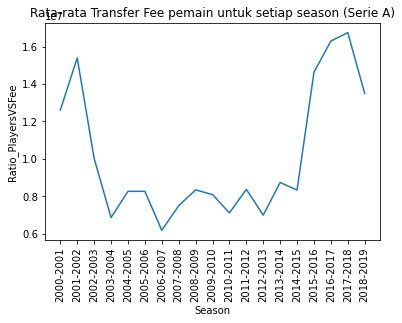

In [262]:
sns.lineplot(data=serieatf, x =serieatf.index, y = 'Ratio_PlayersVSFee')
plt.xticks(rotation = 90)
plt.title('Rata-rata Transfer Fee pemain untuk setiap season (Serie A)')

Dapat dilihat dari grafik rata-rata Transfer Fee setiap liga, perbandingan harga pemain di tahun 2000 dan 2018 berbeda jauh. Pada tahun 2018, harga pemain sudah jauh lebih tinggi daripada tahun 2000. Tetapi ada sedikit hal yang berbeda pada Serie A, dimana harga pemain yang dibeli pada tahun 2000 sudah tinggi, namun mengalami penurunan selama beberapa tahun sampai akhirnya naik dan memiliki harga pemain yang hampir sama pada tahun 2000. dari ketiga grafik tersebut, dapat terlihat bahwa Serie A memiliki rata-rata Transfer_Fee yang paling kecil dimana pembelian yang terjadi pada liga tersebut tidak terlalu mahal.

### ```3.Pemain termahal yang pernah dibeli oleh klub dari 3 liga teratas selama 2001 sampai 2019```

Mencari pembelian termahal Premier League

In [263]:
maxengland = tfprem.loc[tfprem['Transfer_fee'].idxmax()]
maxengland

Name                  Paul Pogba
Position        Central Midfield
Age                           23
Team_from               Juventus
League_from              Serie A
Team_to                  Man Utd
League_to         Premier League
Season                 2016-2017
Transfer_fee           105000000
Name: 3961, dtype: object

Mencari pembelian termahal Serie A

In [264]:
maxitaly =tfserieA.loc[tfserieA['Transfer_fee'].idxmax()]
maxitaly

Name            Cristiano Ronaldo
Position           Centre-Forward
Age                            33
Team_from             Real Madrid
League_from                LaLiga
Team_to                  Juventus
League_to                 Serie A
Season                  2018-2019
Transfer_fee            117000000
Name: 4456, dtype: object

Mencari pembelian termahal La Liga

In [265]:
maxspain = tfLaliga.loc[tfLaliga['Transfer_fee'].idxmax()]
maxspain

Name             Philippe Coutinho
Position        Attacking Midfield
Age                             25
Team_from                Liverpool
League_from         Premier League
Team_to               FC Barcelona
League_to                   LaLiga
Season                   2017-2018
Transfer_fee             125000000
Name: 4212, dtype: object

In [266]:
mostplayer = pd.concat([maxengland, maxspain, maxitaly], axis=1)
mostplayer = mostplayer.T.reset_index()
mostplayer

,index,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
0,3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,105000000
1,4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,125000000
2,4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,117000000


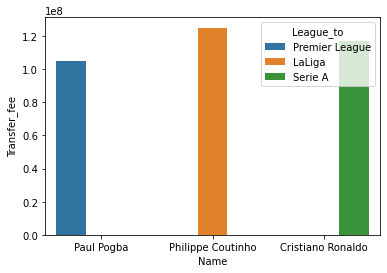

In [267]:
sns.barplot(data=mostplayer, x='Name', y='Transfer_fee', hue='League_to')

Jika dilihat dari ketiga liga, pembelian termahal pemain terjadi pada 3 season terakhir (2016,2017,2018). Pemain tersebut dibeli diatas harga 100 juta Euro. Dari analisa tersebut, dapat disimpulkan bahwa setiap tahun pasar harga pemain pada Transfer Window semakin naik dan pembelian pemain sepakbola yang memiliki kualitas bermain sangat bagus sudah mencapai nilai diatas 100 juta Euro.

### ```4. Team yang paling banyak melakukan pembelian pemain```

In [268]:
topteam = tf.groupby('Team_to')[['League_to']].count().sort_values('League_to', ascending=False)
topteam = topteam.reset_index().head(15)
topteam

,Team_to,League_to
0,Inter,97
1,Chelsea,96
2,Spurs,93
3,Man City,89
4,Juventus,86
5,Liverpool,85
6,AS Roma,77
7,Real Madrid,75
8,FC Barcelona,70
9,Atlético Madrid,69


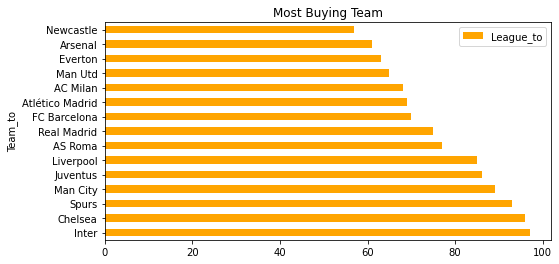

In [269]:
topteam.plot(kind='barh', x = 'Team_to', y = 'League_to', title = 'Most Buying Team', color = 'orange', figsize=(8,4))

dapat dilihat dari ketiga liga tersbut, tim yang paling banyak membeli pemain dari 2000 sampai 2018 adalah klub dari Serie A (Italy). Namun dari total 15 tim, sebanyak 8 tim berasal dari Premier League (Inggris). Sedangkan 7 tim lainnya dibagi menjadi 4 tim dari Serie A (Italy) dan 3 tim dari La Liga (Spain). Dapat disimpulkan bahwa Premier League adalah liga yang paling banyak melakukan aktivitas pembelian pemain.

### ```5. Rata-rata dari total pembelian pemain pada bursa transfer 2000 sampai 2018 dan rata-rata umur pemain yang dibeli```


In [270]:
print('Central Tendency')
print("Max : " +str(tf['Transfer_fee'].max()))
print("Mode : " +str(tf['Transfer_fee'].mode()[0]))
print("Median : " +str(tf['Transfer_fee'].median()))
print("Mean : " +str(tf['Transfer_fee'].mean()))
print("Min : " +str(tf['Transfer_fee'].min()))

Central Tendency
Max : 125000000
Mode : 5000000
Median : 8000000.0
Mean : 11472611.111111112
Min : 900000


In [271]:
print('Central Tendency')
print("Max : " +str(tf['Age'].max()))
print("Mode : " +str(tf['Age'].mode()[0]))
print("Median : " +str(tf['Age'].median()))
print("Mean : " +str(tf['Age'].mean()))
print("Min : " +str(tf['Age'].min()))

Central Tendency
Max : 35
Mode : 24
Median : 24.0
Mean : 24.442063492063493
Min : 16


In [272]:
numcolumn=['Transfer_fee', 'Age']


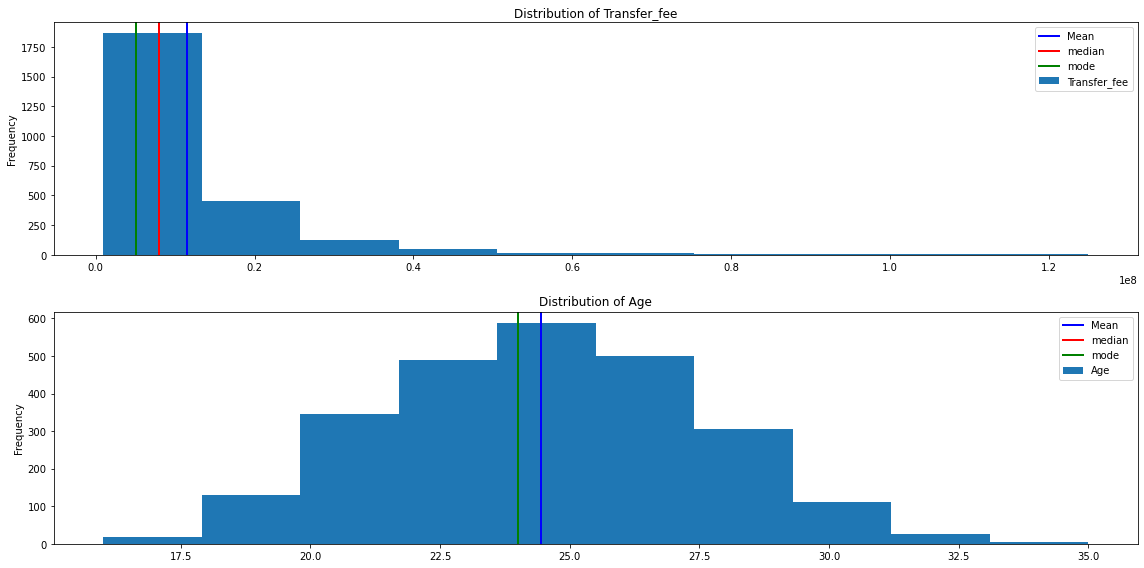

In [273]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
for c, ax in zip(numcolumn, axes):
    tf[[c]].plot(kind='hist', ax=ax)
    mean = tf[c].mean()
    median = tf[c].median()
    mode = tf[c].mode()[0]
    ax.axvline(mean, color='blue', linewidth=2, label=f'Mean');
    ax.axvline(median, color='red', linewidth=2, label=f'median');
    ax.axvline(mode, color='green', linewidth=2, label=f'mode');
    ax.set_title(f'Distribution of {c}')
    ax.legend();

plt.tight_layout()

Berdasarkan hasil perhitungan Central Tendency, 
- Pembelian

dapat dilihat bahwa pemain termurah yang pernah dibeli seharga 900.000 Euro dan pemain termahal seharga 125 Juta Euro. Rata-rata harga pemain secara keseluruhan adalah sekitar 11 juta euro. Dari hasil Central Tendency kita juga dapat melihat bahwa pemain dengan harga 5 juta euro adalah pemain yang terbanyak

- Umur

Dapat dilihat bahwa pemain termuda yang pernah dibeli berumur 16 tahun dan pemain tertua berumur 35 tahun. Rata-rata umur pemain yang dibeli adalah 24 tahun. Pemain yang paling banyak dibeli biasanya juga berumur 24 tahun.



### ```6. Apakah perbedaan rata-rata pengeluaran antara 3 klub teratas pada masing-masing liga signifikan?```
### Pembuktian dilakukan dengan Statistik Inferensial
#### (ANOVA)
Saya ingin mengetahuin apakah perbedaan rata-rata pengeleuaran antara 3 klub tersebut memiliki perbedaan yang signifikan. Untuk pembuktiannya bisa dilakukan dengan uji hipotesis dengan metode ANOVA

```H(0): Chelsea = Real Madrid = Inter Milan``` 
- Perbedaan rata rata pengeluaran 3 klub teratas pada masing-masing liga tidak signifikan

```H(1): Chelsea != Real Madrid != Inter Milan```
- Perbedaan rata rata pengeluaran 3 klub teratas pada masing-masing liga signifikan


In [274]:
chelsea = tfprem.query('Team_to == "Chelsea"')
inter = tfserieA.query('Team_to == "Inter"')
Madrid = tfLaliga.query('Team_to == "Real Madrid"')

In [275]:
chelseaquantity = chelsea.groupby('Season').sum()['Transfer_fee']
madridquantity = Madrid.groupby('Season').sum()['Transfer_fee']
interquantity = inter.groupby('Season').sum()['Transfer_fee']


print("Season Average of Chelsea",chelseaquantity.mean())
print("Season Average of Madrid",madridquantity.mean())
print("Season Average of Inter",interquantity.mean())

Season Average of Chelsea 101147222.22222222
Season Average of Madrid 88455263.15789473
Season Average of Inter 63299473.684210524


In [276]:
f_stat,p_value = stats.f_oneway(chelseaquantity, madridquantity, interquantity)
print('P-value:',p_value)

P-value: 0.07852991356377452


In [277]:
top3club = pd.concat([chelseaquantity,interquantity,madridquantity], axis=1)

top3club.columns = ['Chelsea','Inter Milan','Real Madrid']

top3club

top3club = top3club.reset_index()

top3club = pd.melt(top3club, id_vars = ['index'], value_vars = ['Chelsea','Inter Milan', 'Real Madrid'] )
top3club

,index,variable,value
0,2000-2001,Chelsea,52150000.0
1,2001-2002,Chelsea,44800000.0
2,2003-2004,Chelsea,169200000.0
3,2004-2005,Chelsea,165500000.0
4,2005-2006,Chelsea,91200000.0
5,2006-2007,Chelsea,87900000.0
6,2007-2008,Chelsea,59000000.0
7,2008-2009,Chelsea,30500000.0
8,2009-2010,Chelsea,28250000.0
9,2010-2011,Chelsea,118500000.0


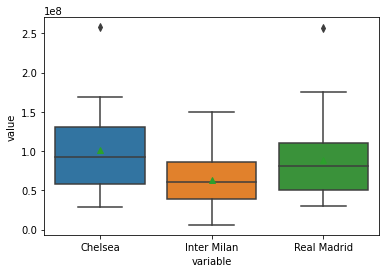

In [278]:
sns.boxplot(data = top3club, x ='variable', y='value',showmeans = True)

Dari hasil hipotesis testing dengan metode ANOVA didapatkan p-value lebih dari 0.05 yang berarti hipotesis awal(H0) fail to reject. Antara Chelsea,Real Madrid, dan Inter Milan, rata-rata yang pengeluaran 3 klub tersebut selama 2000 sampai 2018 tidak memiliki perbedaan yang signifikan, yang artinya jumlah pengeluaran yang mereka keluarkan untuk membeli pemain hampir sama.

# PENGAMBILAN KESIMPULAN

Berdasarkan analisa transfer pemain sepakbola yang sudah dilakukan, didapatkan beberapa informasi tentang aktivitas transfer selama 18 tahun terakhir (2000-2018)
- Dari total aktivitas transfer 3 liga Eropa ```(England, Spain, Italy```), sebanyak 49,8% merupakan pembelian dari Premier League ```(England)```. Sedangkan sisanya adalah 29,3% dari Serie A ```(Italy)``` dan 20,8% dari La Liga ```(Spain)```. Dapat disimpulkan bahwa setengah dari pembelian pemain dilakukan oleh Premier League
- Dari 3 liga```(England, Spain, Italy)```, semua liga lebih banyak melakukan pembelian pemain daripada penjualan pemain, yang artinya semua liga mengalami kerugian
- Perbandingan rata-rata harga pemain dari tahun 2000 dan tahun 2018 sudah meningkat naik, dimana rata-rata harga pemain pada era sepakbola modern sangat jauh dibandingkan dengan harga pemain pada era 2000an
- Karena harga pemain semakin lama semakin naik, maka jika suatu tim ingin membeli pemain yang berkualitas, tim tersebut harus mengeluarkan uang yang lebih banyak. hal ini dapat dilihat dari grafik rata-rata Transfer Fee setiap season
- Pemain termahal yang pernah dibeli oleh setiap liga berasal dari Season 3 tahun terakhir pada data yaitu Paul Pogba (2016-2017) ke Premier League, Philippe Countinho (2017-2018) ke La Liga, dan Cristiano Ronaldo (2018-2019) ke Serie A
- Tim terbanyak yang melakukan pembelian pemain berasal dari Premier League ```(England)```. Dari total gabungan liga 15 tim teratas yang paling banyak membeli pemain, 8 tim berasal dari Premier League
- Perbedaan rata-rata pengeluaran  antara 3 klub yang paling membeli pemain yang dibagi berdasarkan liga, antara Chelsea, Real Madrid, dan Inter milan tidak memiliki perbedaan rata-rata pengeluaran yang signifikan (berbeda tipis)